# Customer Churn Analysis

Problem Statement:
    
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv'

In [5]:
df=pd.read_csv(url)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have only 3 features as numerical rest others are all categorical. Our target feature is also categorical

In [7]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

1.CustomerID has 7043 unique values hence we can say that it is unique to each customer and can be dropped.

2.Our target variable as only 2 unique values, Identifying its a classification problem

In [11]:
df.drop(['customerID'],axis=1,inplace=True)

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: 

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

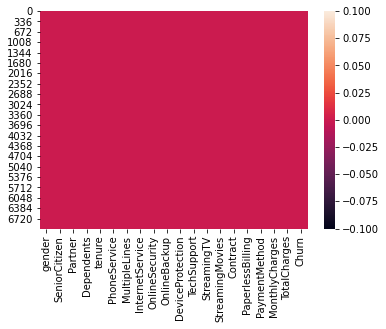

In [14]:
sns.heatmap(df.isnull())
plt.show()

From the above data we can verify that our data has no Null values.

<AxesSubplot:>

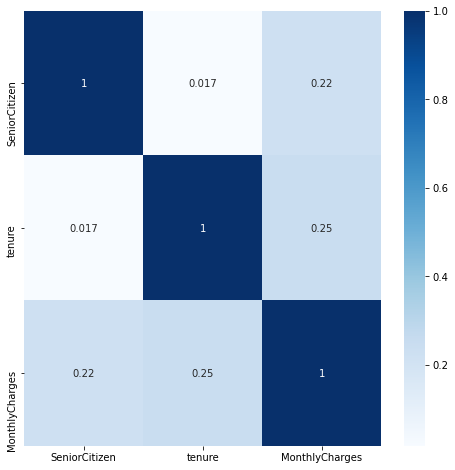

In [15]:
corr=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Since most of the features are categorical we have only few data to check corelation.

From above we can say that none of the numerical features are co related with each other.

Let's check each feature presence in the dataset and its effect on our target variable.

<AxesSubplot:ylabel='Churn'>

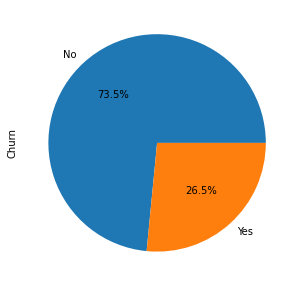

In [16]:
df['Churn'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

In the given dataset 26.5% of the customer leaves the services.

<AxesSubplot:ylabel='gender'>

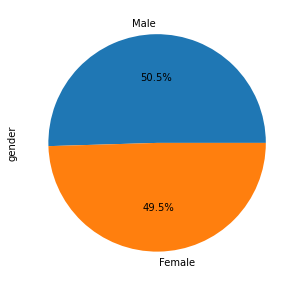

In [17]:
df['gender'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

The data is equally distributed among Male and Female.

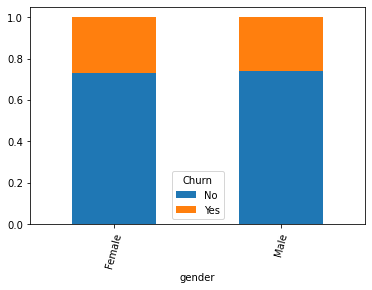

In [18]:
ct = pd.crosstab(df.gender, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Gender plays no role whether the customer will leave the service or not.

<AxesSubplot:ylabel='SeniorCitizen'>

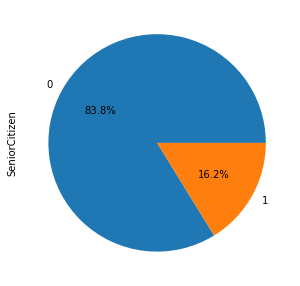

In [19]:
df['SeniorCitizen'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

16.2% of the customer are senior citizens.

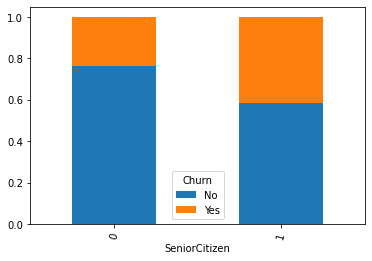

In [20]:
ct = pd.crosstab(df.SeniorCitizen, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Senior citizen are more likely to leave the services.

<AxesSubplot:ylabel='Partner'>

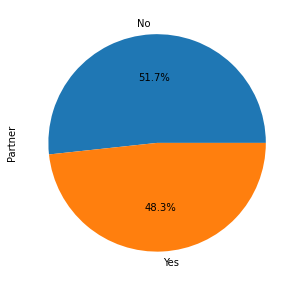

In [21]:
df['Partner'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

48.3% customer have their partners.

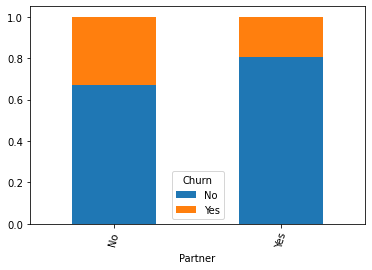

In [22]:
ct = pd.crosstab(df.Partner, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having partner make them less likey to leave the service.

<AxesSubplot:ylabel='Dependents'>

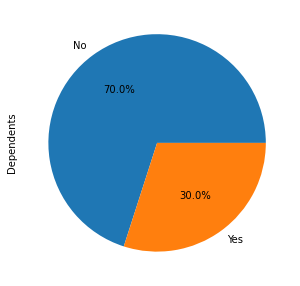

In [23]:
df['Dependents'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

30% of the subscribers have dependents

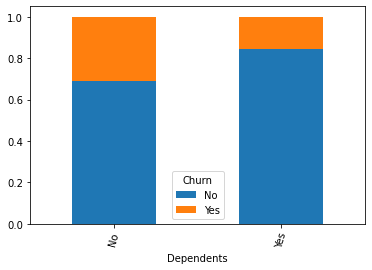

In [25]:
ct = pd.crosstab(df.Dependents, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having No dependents can make the subscriber leave the service.

<AxesSubplot:ylabel='PhoneService'>

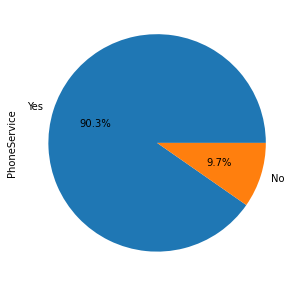

In [26]:
df['PhoneService'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

9.7% of the subscriber have no phone service.

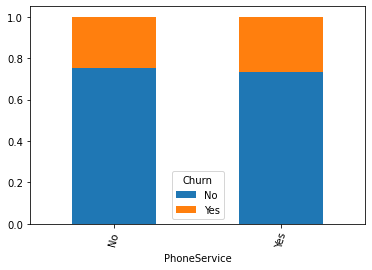

In [27]:
ct = pd.crosstab(df.PhoneService, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having phone service do not have any impact on customer leaving the service.

<AxesSubplot:ylabel='InternetService'>

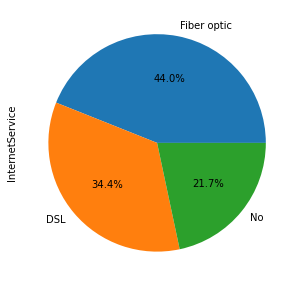

In [28]:
df['InternetService'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

Around 44% of the users use Fibre optic.

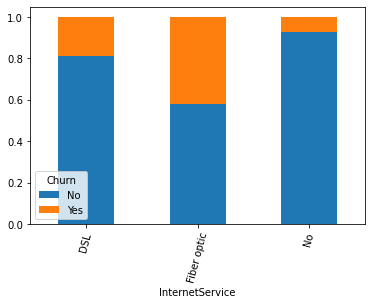

In [29]:
ct = pd.crosstab(df.InternetService, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having No internet service can make the user stay with the service.

<AxesSubplot:ylabel='StreamingTV'>

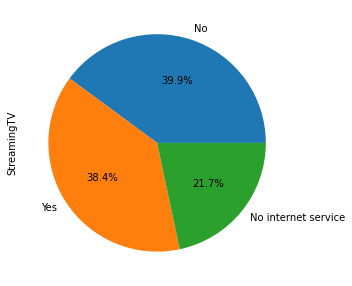

In [30]:
df['StreamingTV'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

39.9% of the user did not opt for the Streaming Tv service.

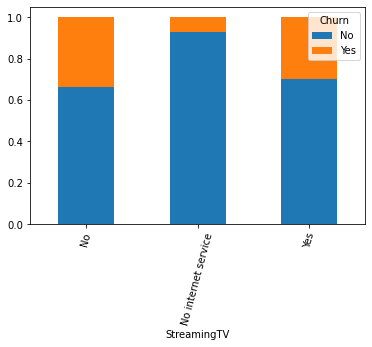

In [31]:
ct = pd.crosstab(df.StreamingTV, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having No internet service can make the user stay with the service.

<AxesSubplot:ylabel='StreamingMovies'>

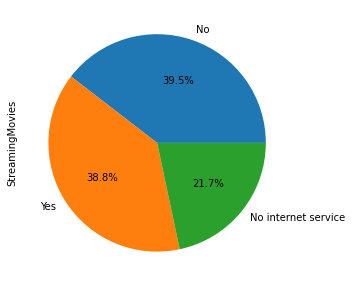

In [32]:
df['StreamingMovies'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

39.5% of the user did not opt for the Streaming Movies service.

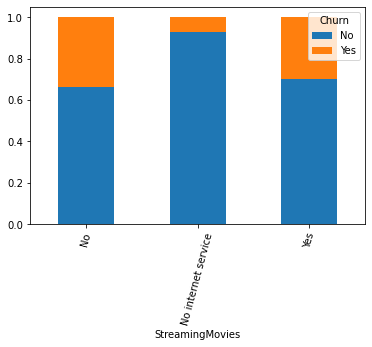

In [33]:
ct = pd.crosstab(df.StreamingMovies, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Same like streaming TV, users with no internet service have less chance of leaving the service.

Is there something wrong with the internet service?

Churn is mrore among the users who use internet services like Fibre Optics and DSL.

The telecom company need to check if the quality of service needs to be improved.

<AxesSubplot:ylabel='Contract'>

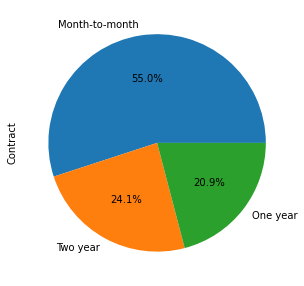

In [34]:
df['Contract'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

55 of the users have month to month contract.

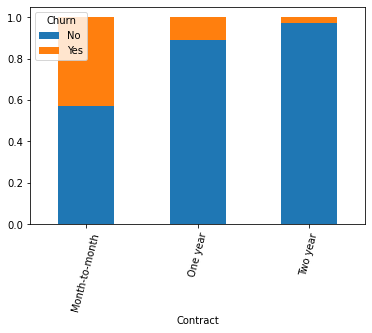

In [35]:
ct = pd.crosstab(df.Contract, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having a long contract can make the user stays with the services.

Company has to make the long plan more attractive.

Let's check for the outliers

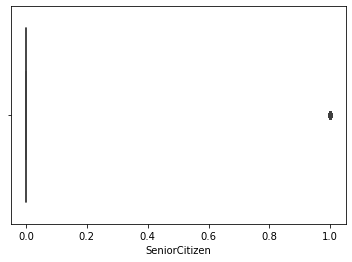

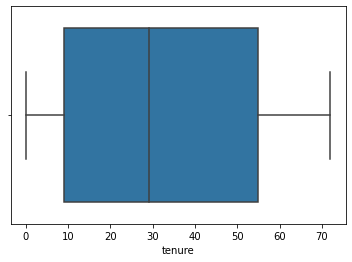

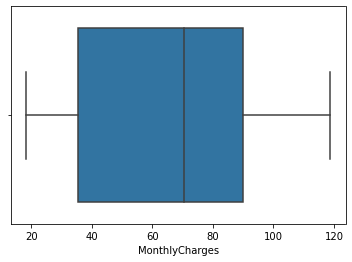

In [36]:
for i in df.columns:
    if df[i].dtypes!=object:
        sns.boxplot(df[i]) 
        plt.show()

There is no outliers presents. Since senior citizen has only 2 variable,1 is showing as outliers which is not correct.

Let's check for skewness.

In [37]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

Senior citizen is more of a categorical data hence we can conclude that there is no skewness present in the dataset.

Now we will change the categorical data using LabelEncoder

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [39]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

In [40]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


Since or data is imbalance we will now balance it using oversampling from SMOTE.

But before that we will split the data into input and target variable.

In [41]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']
y=pd.DataFrame(data=y)

In [42]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [43]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [44]:
x.shape,y.shape

((7043, 19), (7043, 1))

Import the SMOTE library for over sampling the data.

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
SM=SMOTE()
X,Y=SM.fit_resample(x,y)
y_new=pd.DataFrame(data=Y)
x_new=pd.DataFrame(data=X)

In [47]:
y_new.value_counts()

Churn
1        5174
0        5174
dtype: int64

We can see that the class is now balance.

In [48]:
print(x_new.shape)
print(y_new.shape)

(10348, 19)
(10348, 1)


We will bring our data to the standard scale using Standard Scaler

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_new)
sc_x=pd.DataFrame(sc_x,columns=x_new.columns)

In [50]:
sc_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.856349,-0.393423,1.296736,-0.52022,-1.112331,-2.920367,0.105295,-1.228864,-0.753092,1.456074,-0.889598,-0.762491,-1.033679,-1.039528,-0.642543,0.835169,0.445894,-1.343790,-0.409461
1,1.167748,-0.393423,-0.771167,-0.52022,0.267362,0.342423,-0.973509,-1.228864,1.732317,-0.889968,1.443581,-0.762491,-1.033679,-1.039528,0.669421,-1.197363,1.455105,-0.394461,-0.955069
2,1.167748,-0.393423,-0.771167,-0.52022,-1.070522,0.342423,-0.973509,-1.228864,1.732317,1.456074,-0.889598,-0.762491,-1.033679,-1.039528,-0.642543,0.835169,1.455105,-0.503056,-1.642462
3,1.167748,-0.393423,-0.771167,-0.52022,0.727260,-2.920367,0.105295,-1.228864,1.732317,-0.889968,1.443581,1.710169,-1.033679,-1.039528,0.669421,-1.197363,-1.572527,-0.907659,-0.989727
4,-0.856349,-0.393423,-0.771167,-0.52022,-1.070522,0.342423,-0.973509,0.249602,-0.753092,-0.889968,-0.889598,-0.762491,-1.033679,-1.039528,-0.642543,0.835169,0.445894,0.087209,-1.239163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1.167748,-0.393423,-0.771167,-0.52022,-1.028714,0.342423,-0.973509,0.249602,-0.753092,-0.889968,-0.889598,-0.762491,-1.033679,-1.039528,-0.642543,-1.197363,0.445894,0.080330,-0.827463
10344,-0.856349,2.541792,1.296736,-0.52022,0.810877,0.342423,1.184099,0.249602,-0.753092,-0.889968,1.443581,-0.762491,0.095717,0.089346,-0.642543,0.835169,0.445894,1.078003,0.435995
10345,1.167748,-0.393423,-0.771167,-0.52022,0.601833,0.342423,1.184099,0.249602,-0.753092,-0.889968,-0.889598,1.710169,1.225113,1.218219,0.669421,0.835169,0.445894,1.144848,0.162929
10346,-0.856349,-0.393423,-0.771167,-0.52022,0.476406,0.342423,1.184099,0.249602,0.489612,0.283053,-0.889598,0.473839,0.095717,-1.039528,-0.642543,-1.197363,-1.572527,0.821921,-0.064452


In [51]:
y=y_new
x=sc_x
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.856349,-0.393423,1.296736,-0.52022,-1.112331,-2.920367,0.105295,-1.228864,-0.753092,1.456074,-0.889598,-0.762491,-1.033679,-1.039528,-0.642543,0.835169,0.445894,-1.343790,-0.409461
1,1.167748,-0.393423,-0.771167,-0.52022,0.267362,0.342423,-0.973509,-1.228864,1.732317,-0.889968,1.443581,-0.762491,-1.033679,-1.039528,0.669421,-1.197363,1.455105,-0.394461,-0.955069
2,1.167748,-0.393423,-0.771167,-0.52022,-1.070522,0.342423,-0.973509,-1.228864,1.732317,1.456074,-0.889598,-0.762491,-1.033679,-1.039528,-0.642543,0.835169,1.455105,-0.503056,-1.642462
3,1.167748,-0.393423,-0.771167,-0.52022,0.727260,-2.920367,0.105295,-1.228864,1.732317,-0.889968,1.443581,1.710169,-1.033679,-1.039528,0.669421,-1.197363,-1.572527,-0.907659,-0.989727
4,-0.856349,-0.393423,-0.771167,-0.52022,-1.070522,0.342423,-0.973509,0.249602,-0.753092,-0.889968,-0.889598,-0.762491,-1.033679,-1.039528,-0.642543,0.835169,0.445894,0.087209,-1.239163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1.167748,-0.393423,-0.771167,-0.52022,-1.028714,0.342423,-0.973509,0.249602,-0.753092,-0.889968,-0.889598,-0.762491,-1.033679,-1.039528,-0.642543,-1.197363,0.445894,0.080330,-0.827463
10344,-0.856349,2.541792,1.296736,-0.52022,0.810877,0.342423,1.184099,0.249602,-0.753092,-0.889968,1.443581,-0.762491,0.095717,0.089346,-0.642543,0.835169,0.445894,1.078003,0.435995
10345,1.167748,-0.393423,-0.771167,-0.52022,0.601833,0.342423,1.184099,0.249602,-0.753092,-0.889968,-0.889598,1.710169,1.225113,1.218219,0.669421,0.835169,0.445894,1.144848,0.162929
10346,-0.856349,-0.393423,-0.771167,-0.52022,0.476406,0.342423,1.184099,0.249602,0.489612,0.283053,-0.889598,0.473839,0.095717,-1.039528,-0.642543,-1.197363,-1.572527,0.821921,-0.064452


# Model Fitting and Selection

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score

We will check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models.

In [53]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.821256038647343  on Random state 91


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=91)

In [55]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)

model=[lg,sv,knn,rfc,dtc,gnb,adc]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.821256038647343
[[853 227]
 [143 847]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1080
           1       0.79      0.86      0.82       990

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8516908212560387
[[904 176]
 [131 859]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1080
           1       0.83      0.87      0.85       990

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

-------------------------------------------------------------------------------------------


RFC has perforwed well with test accuracy of 87%
Lets check the overfitting and underfitting of all the model.

# Cross Validation

We will check the Underfitting or Overfitting of the model using Cross Validation

In [56]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.7950398218000714
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.8142752338990806
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.7900158540030774
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.8384356605328719
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.7859606381761592
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.7843135029875106
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.8164968957441691
-------------------------------------------------------------------------------


RFC is underfitting and KNN is giving least difference with test accuracy of 83% and CV score of 79%

We will check the ROC_AUC score to pick the final model

# ROC_AUC score

AUC Score of LogisticRegression()
0.8226851851851851




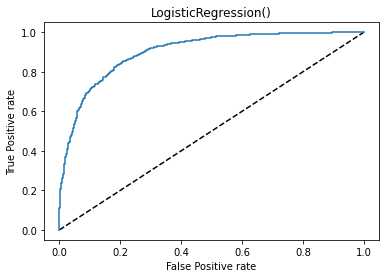



------------------------------------------------------------------------
AUC Score of SVC(probability=True)
0.8523569023569024




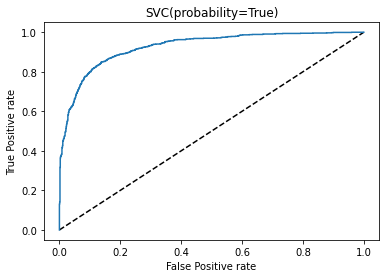



------------------------------------------------------------------------
AUC Score of KNeighborsClassifier()
0.7990319865319866




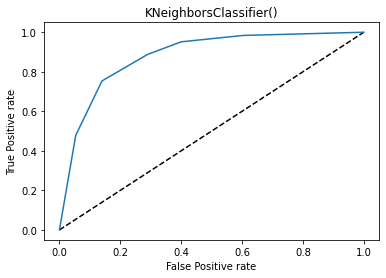



------------------------------------------------------------------------
AUC Score of RandomForestClassifier()
0.8703703703703705




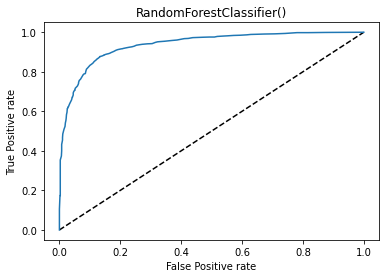



------------------------------------------------------------------------
AUC Score of DecisionTreeClassifier()
0.80513468013468




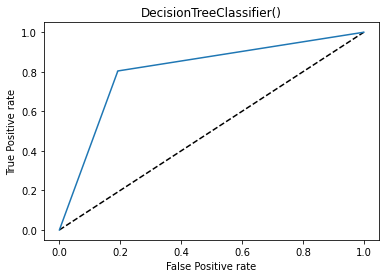



------------------------------------------------------------------------
AUC Score of GaussianNB()
0.8008838383838384




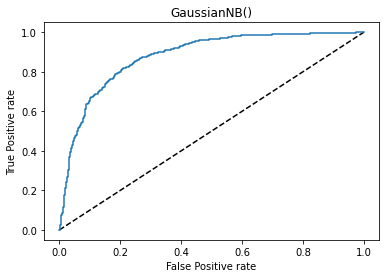



------------------------------------------------------------------------
AUC Score of AdaBoostClassifier(n_estimators=100)
0.8490740740740741




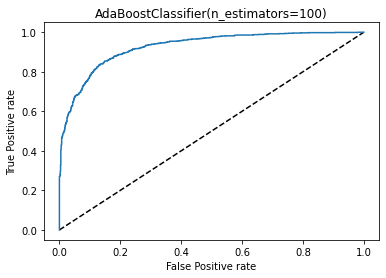



------------------------------------------------------------------------


In [57]:
auc=[]
for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    auc.append(auc_score)
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print('\n')
    print('------------------------------------------------------------------------')

In [58]:
Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier'],
           'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.821256,0.795040,0.822685
1,SVC,0.851691,0.814275,0.852357
2,KNeighborsClassifier,0.795169,0.790016,0.799032
3,RandomForestClassifier,0.870531,0.838436,0.870370
4,DecisionTreeClassifier,0.805314,0.785961,0.805135
5,GaussianNB,0.800000,0.784314,0.800884
6,AdaBoostClassifier,0.847826,0.816497,0.849074


From the above metrics we can conclude that:
    
1. DTC and KNN has performed well with least difference on CV score.

2. RFC has given us the best accuracy of 87% Cv score of 83% and ROC AUC score of 87%

3. KNN has test accuracy of 79% CV score of 79% and ROC AUC score of 80%

4. DTC has test accuracy of 79% CV score of 78% and ROC AUC score of 79%

# HyperTuning of the model

In [59]:
from sklearn.model_selection import GridSearchCV

HyperTuning of RFC

In [61]:
params ={'max_depth':list(range(200,400,50)),
         'n_estimators':list(range(10,120,20)),
         'max_features': ['auto', 'sqrt', 'log2'], 
         'criterion' : ['gini','entropy'],
         }

In [63]:
grid_search=GridSearchCV(rfc,params,verbose=4,refit=True,cv = 5,n_jobs = -1)

In [64]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [200, 250, 300, 350],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 30, 50, 70, 90, 110]},
             verbose=4)

RFC Performance after HyperTuning
-----------------------------------------------
Accuracy Score 86.32850241545894
Cross Validation Score 83.34107587739882
AUC ROC Score 86.31734006734007


AUC ROC Curve with Final Mod


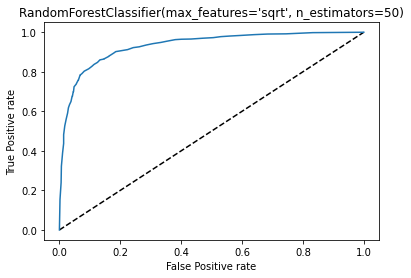

In [65]:
Finalmod=RandomForestClassifier(max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=50)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)

cvs=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score=roc_auc_score(y_test,Finalmod.predict(x_test))

print('RFC Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc*100)
print('Cross Validation Score',cvs.mean()*100)
print('AUC ROC Score',auc_score*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod)
plt.show()

HyperTuning of KNN

In [66]:
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

In [68]:
grid_search=GridSearchCV(knn,params,verbose=4,refit=True,cv = 5,n_jobs = -1)

In [69]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=4)

KNN Performance after HyperTuning
-----------------------------------------------
Accuracy Score 81.30434782608695
Cross Validation Score 79.26260906923693
AUC ROC Score 81.5151515151515


AUC ROC Curve with Final Mod


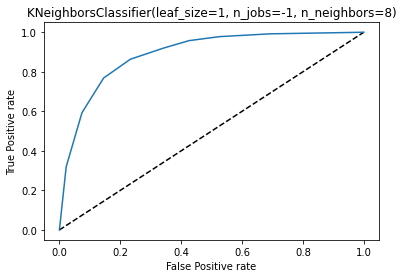

In [70]:
Finalmod1=KNeighborsClassifier(algorithm='auto', leaf_size=1, n_jobs= -1, n_neighbors=8, weights='uniform')
Finalmod1.fit(x_train,y_train)
pred1=Finalmod1.predict(x_test)
acc1=accuracy_score(y_test,pred1)

cvs1=cross_val_score(Finalmod1,x,y,cv=5)
y_pred_prob1=Finalmod1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob1)
auc_score1=roc_auc_score(y_test,Finalmod1.predict(x_test))

print('KNN Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc1*100)
print('Cross Validation Score',cvs1.mean()*100)
print('AUC ROC Score',auc_score1*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=KNeighborsClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod1)
plt.show()

KNN has shown the slight improvement with 81.30% accuracy CV score of 79.88% and AUC ROC score of 80.79%

HyperTuning of DTC

In [71]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

In [72]:
grid_search=GridSearchCV(dtc,params,verbose=4,refit=True,cv = 5,n_jobs = -1)

In [73]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 462 candidates, totalling 2310 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15],
                         'random_state': [123]},
             verbose=4)

DTC Performance after HyperTuning
-----------------------------------------------
Accuracy Score 81.54589371980676
Cross Validation Score 79.41730584683494
AUC ROC Score 81.46464646464648


AUC ROC Curve with Final Mod


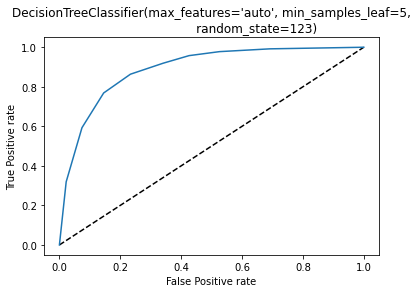

In [74]:
Finalmod2=DecisionTreeClassifier(max_features='auto', min_samples_leaf=5, min_samples_split= 2, random_state=123)
Finalmod2.fit(x_train,y_train)
pred2=Finalmod2.predict(x_test)
acc2=accuracy_score(y_test,pred2)

cvs2=cross_val_score(Finalmod2,x,y,cv=5)
y_pred_prob2=Finalmod2.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob1)
auc_score2=roc_auc_score(y_test,Finalmod2.predict(x_test))

print('DTC Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc2*100)
print('Cross Validation Score',cvs2.mean()*100)
print('AUC ROC Score',auc_score2*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=DecisionTreeClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod2)
plt.show()

DTC has test accuracy of 81.5% ,CV score of 79% and AUC ROC score of 81.46%

Since RFC has given me the best test accuracy of 87%, will go ahead and select that has Final Model

In [75]:
import joblib
joblib.dump(Finalmod,'Customer_Churn.obj')

['Customer_Churn.obj']